# Regresión - Regresión simple con LinearSVR

In [ ]:
! pip install openml

In [ ]:
import openml

data = openml.datasets.get_dataset(183).get_data(dataset_format="dataframe")[0]

data

<ipython-input-3-ba1f99bdfa02>:3: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  data = openml.datasets.get_dataset(183).get_data(dataset_format="dataframe")[0]


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
data["x1"] = data["Height"]
data["x2"] = data["Length"]

data[["x1", "x2"]]

,x1,x2
0,0.095,0.455
1,0.090,0.350
2,0.135,0.530
3,0.125,0.440
4,0.080,0.330
...,...,...
4172,0.165,0.565
4173,0.135,0.590
4174,0.205,0.600
4175,0.150,0.625


In [ ]:
data["x1"].cov(data["x2"]) # :( | NOTA: -inf, inf (no hay escala | no está normalizado)

0.004156911887255239

In [ ]:
data["x1"].corr(data["x2"]) # :) | NOTA: -1, 1   (está normalizado)

0.8275536093192105

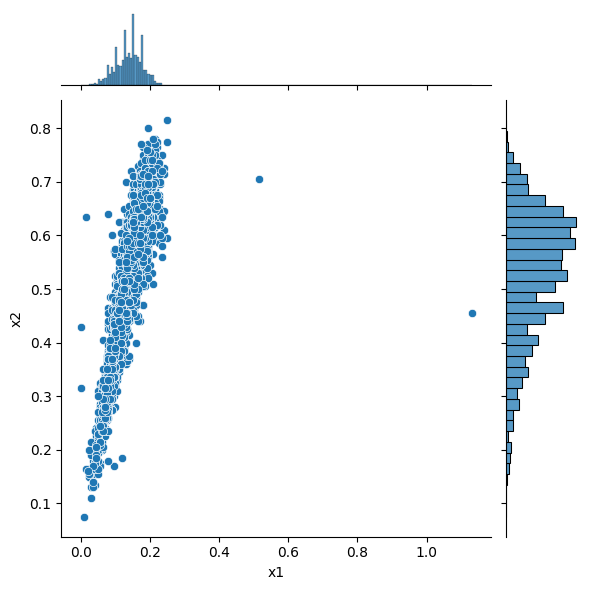

In [ ]:
import seaborn as sns

sns.jointplot(data, x="x1", y="x2")

In [ ]:
mask1 = data["x1"] >= data["x1"].quantile(0.025)
mask2 = data["x1"] <= data["x1"].quantile(0.975)
mask3 = data["x2"] >= data["x2"].quantile(0.025)
mask4 = data["x2"] <= data["x2"].quantile(0.975)

data1 = data[ mask1 & mask2 & mask3 & mask4 ].copy()

data1

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings,x1,x2
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.095,0.455
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.090,0.350
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0.135,0.530
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.125,0.440
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.080,0.330
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0.165,0.565
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.135,0.590
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.205,0.600
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0.150,0.625


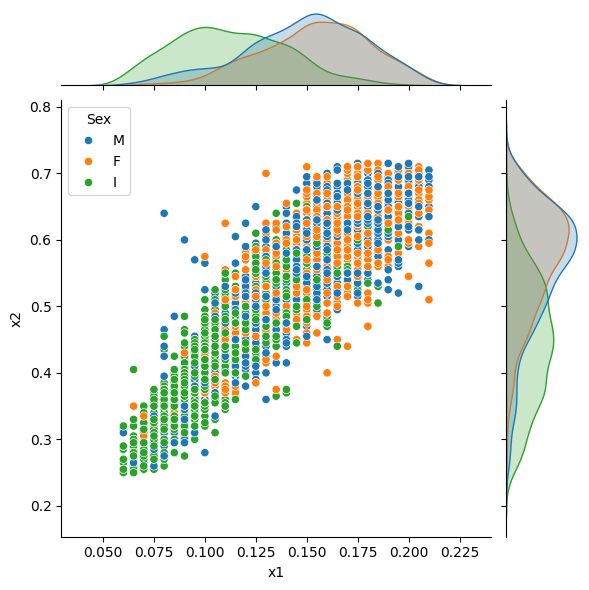

In [ ]:
import seaborn as sns

sns.jointplot(data1, x="x1", y="x2", hue="Sex")

<Axes: xlabel='x1', ylabel='x2'>

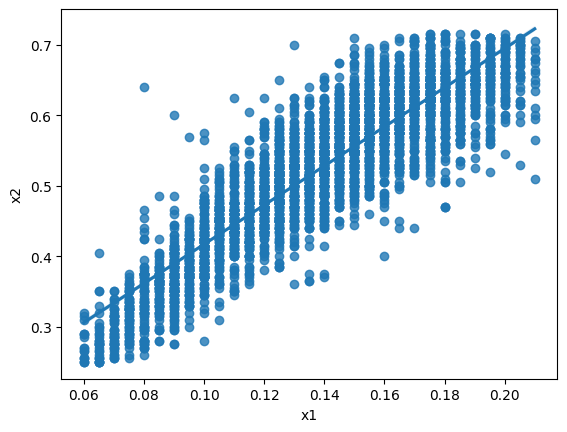

In [ ]:
import seaborn as sns

sns.regplot(data1, x="x1", y="x2")

In [ ]:
X = data1[["x1"]]
Y = data1[["x2"]]

In [ ]:
from sklearn.svm import LinearSVR

reg = LinearSVR()

reg.fit(X, Y)

reg.score(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7847647769015182

In [ ]:
reg.coef_ # PENDIENTE (m) | y = m * x + b

array([2.81148966])

In [ ]:
reg.intercept_ # BIAS (b) | y = m * x + b

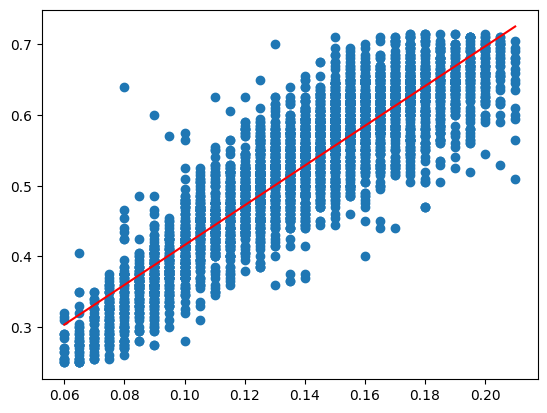

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

m = reg.coef_
b = reg.intercept_

x = np.linspace(X["x1"].min(), X["x1"].max(), 100)
y = m * x + b

plt.scatter(X["x1"], Y["x2"])
plt.plot(x, y, "r")
plt.show()

In [ ]:
m * 0.12 + b

array([0.47217234])

In [ ]:
reg.predict([
    [0.12],
    [0.39],
    [0.03],
    [0.18],
])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


array([0.47217234, 1.23127455, 0.21913828, 0.64086172])

## Caso de estudio - Regresión Múltiple en Vivendas

In [ ]:
import pandas as pd

data = pd.read_csv("/content/sample_data/california_housing_train.csv")

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
data["x1"] = data["total_rooms"]
data["x2"] = data["total_bedrooms"]

data["y"] = data["median_house_value"]

data[["x1", "x2", "y"]]

,x1,x2,y
0,5612.0,1283.0,66900.0
1,7650.0,1901.0,80100.0
2,720.0,174.0,85700.0
3,1501.0,337.0,73400.0
4,1454.0,326.0,65500.0
...,...,...,...
16995,2217.0,394.0,111400.0
16996,2349.0,528.0,79000.0
16997,2677.0,531.0,103600.0
16998,2672.0,552.0,85800.0


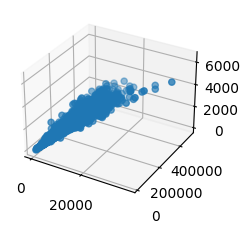

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(data["x1"], data["y"], data["x2"])

plt.savefig("r1.png")
plt.show()

In [ ]:
X = data[["x1", "x2"]]
Y = data["y"]

In [ ]:
from sklearn.svm import LinearSVR

reg = LinearSVR()

reg.fit(X, Y)

reg.score(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-1.0940793326257774

In [ ]:
reg.coef_

array([57.54112115,  0.44898902])

In [ ]:
m1 = reg.coef_[0]
m2 = reg.coef_[1]

In [ ]:
reg.intercept_

array([5839.99268284])

In [ ]:
b = reg.intercept_[0]

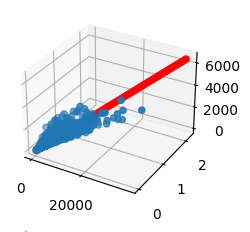

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(data["x1"].min(), data["x1"].max(), 100)
x2 = np.linspace(data["x2"].min(), data["x2"].max(), 100)

y = m1 * x1 + m2 * x2 + b

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(data["x1"], data["y"], data["x2"])
ax.scatter(x1, y, x2, c="red")

plt.savefig("r2.png")
plt.show()

In [ ]:
m1 * 4000 + m2 * 1000

230613.47360719

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

reg.fit(X, Y)

reg.score(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVR

reg = SVR(kernel="poly", degree=1)

reg.fit(X, Y)

reg.score(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.051214280505085474

In [ ]:
from sklearn.model_selection import cross_val_score

reg1 = SVR(kernel="poly", degree=1)
reg2 = SVR(kernel="poly", degree=2)
reg3 = SVR(kernel="poly", degree=3)

score1 = cross_val_score(reg1, X, Y)
score2 = cross_val_score(reg2, X, Y)
score3 = cross_val_score(reg3, X, Y)

score1, score2, score3

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

(array([ 0.00253006, -0.10572978, -0.19252375, -0.08431314, -0.34479859]),
 array([-0.00824267, -0.11057366, -0.18852551, -0.08091387, -0.34457335]),
 array([-0.00780603, -0.10705124, -0.19347158, -0.08658892, -0.34775549]))